In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[*********************100%***********************]  1 of 1 completed


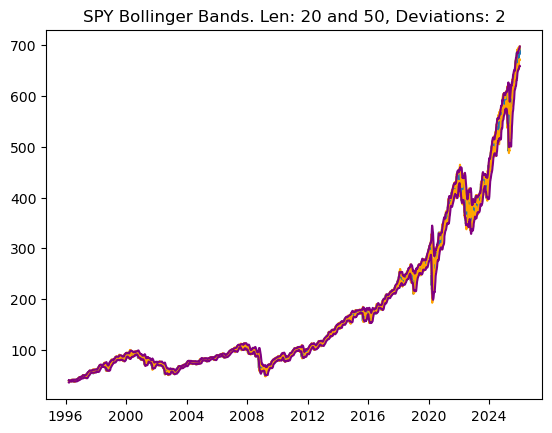

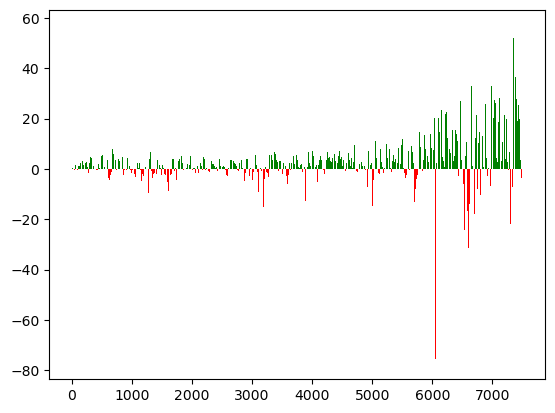

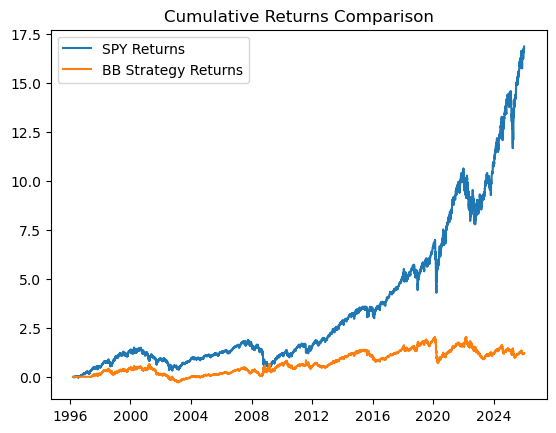

Price,Close,High,Low,Open,Volume,BB_SMA_1,STD_1,Upper_Band_1,Lower_Band_1,BB_SMA_2,STD_2,Upper_Band_2,Lower_Band_2,BB_hist,Strategy,signal,Asset_returns,strategy_returns
Date,,,,,,,,,,,,,,,,,,
1996-03-20,38.867882,39.100959,38.569544,39.100959,744300,38.561370,0.462485,39.486341,37.636400,37.914091,1.137078,40.188246,35.639936,1.294558,NaN,NaN,NaN,NaN
1996-03-21,38.774662,38.933154,38.644139,38.914508,650800,38.536065,0.434021,39.404107,37.668023,37.977110,1.094053,40.165215,35.789004,1.117910,0.0,NaN,-0.002398,0.000000
1996-03-22,38.877193,38.979747,38.746670,38.793286,344500,38.521455,0.416130,39.353715,37.689195,38.037909,1.056532,40.150973,35.924845,0.967092,0.0,NaN,0.000240,0.000000
1996-03-25,38.802628,39.268781,38.700074,39.231489,802400,38.530963,0.420469,39.371900,37.690026,38.098332,1.010230,40.118792,36.077871,0.865263,0.0,NaN,-0.001679,0.000000
1996-03-26,38.989075,39.091628,38.700060,38.737352,969400,38.555825,0.432560,39.420946,37.690705,38.163968,0.956914,40.077796,36.250140,0.783716,0.0,NaN,0.003118,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-05,687.719971,689.429993,686.380005,686.539978,71927200,682.999088,5.419348,693.837783,672.160392,677.538058,8.929721,695.397499,659.678617,10.922059,1.0,1.0,16.693786,1.185273
2026-01-06,691.809998,692.320007,687.780029,687.929993,69273800,683.406097,5.766904,694.939905,671.872289,677.978640,9.081338,696.141316,659.815964,10.854915,1.0,1.0,16.799015,1.198269
2026-01-07,689.580017,693.960022,689.320007,692.190002,75588300,683.804303,5.909972,695.624247,671.984359,678.265146,9.218584,696.702314,659.827979,11.078313,1.0,1.0,16.741641,1.191183


In [7]:
ticker = "SPY"
BB_LENGTH_1 = 20 
BB_LENGTH_2 = 50
devs= 2
LOOKBACK = -10000

def get_data():
    df = yf.download(ticker, period = '30y', auto_adjust=True, interval='1d')
    df.sort_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[LOOKBACK:,:]

def add_bollinger_bands(df, BB_LENGTH_1, BB_LENGTH_2, devs): 
    ##11
    df['BB_SMA_1'] = df['Close'].rolling(window=BB_LENGTH_1).mean() 
    df['STD_1'] = df['Close'].rolling(window=BB_LENGTH_1).std()
    df['Upper_Band_1'] = df['BB_SMA_1'] + (df['STD_1'] * devs)
    df['Lower_Band_1'] = df['BB_SMA_1'] - (df['STD_1'] * devs)

    ##22
    df['BB_SMA_2'] = df['Close'].rolling(window=BB_LENGTH_2).mean() 
    df['STD_2'] = df['Close'].rolling(window=BB_LENGTH_2).std()
    df['Upper_Band_2'] = df['BB_SMA_2'] + (df['STD_2'] * devs)
    df['Lower_Band_2'] = df['BB_SMA_2'] - (df['STD_2'] * devs)

    df = df.dropna().copy()

    df['BB_hist'] = (abs(df['Lower_Band_1'] - df['Lower_Band_2']) - abs(df['Upper_Band_2'] - df['Upper_Band_1']))

    plt.plot(df['Close'])
    plt.plot(df['Upper_Band_1'], color='orange')
    plt.plot(df['Lower_Band_1'], color='orange')
    plt.plot(df['Upper_Band_2'], color = 'purple')
    plt.plot(df['Lower_Band_2'], color = 'purple')
    plt.title(f'{ticker} Bollinger Bands. Len: {BB_LENGTH_1} and {BB_LENGTH_2}, Deviations: {devs}')

    plt.figure()
    plt.bar(range(len(df)), df['BB_hist'], color=np.where(df['BB_hist']<0, 'red', 'green'))

    return df

def strategy(df):
    threshold = df['BB_hist'].std() * 0.5

    df['Strategy'] = 0
    
    # 1. Define Conditions with a "Buffer Zone"
    conditions = [
        (df['BB_hist'] > threshold),  # Strong Uptrend (Green)
        (df['BB_hist'] < -threshold)  # Strong Downtrend (Red)
    ]
    
    choices = [1, -1] # Long, Short
    
    # 2. Generate Signals
    # If between -threshold and +threshold, default to NaN (Hold)
    df['signal'] = np.select(conditions, choices, default=np.nan)
    
    # 3. Forward Fill (The Memory)
    df['Strategy'] = df['signal'].ffill()
    df['Strategy'] = df['Strategy'].fillna(0)
    
    # 4. Shift logic
    df['Strategy'] = df['Strategy'].shift(1)
    
    return df

def test_strategy(df):
    df['Asset_returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['strategy_returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_returns'], label=f'{ticker} Returns')
    plt.plot(df['strategy_returns'], label='BB Strategy Returns')
    plt.legend()
    plt.title('Cumulative Returns Comparison')
    plt.show()

    return df

def main():
    df = get_data()
    df = add_bollinger_bands(df, BB_LENGTH_1, BB_LENGTH_2, devs)
    df = strategy(df)
    df = test_strategy(df)
    return df

df = main()
df